# intro

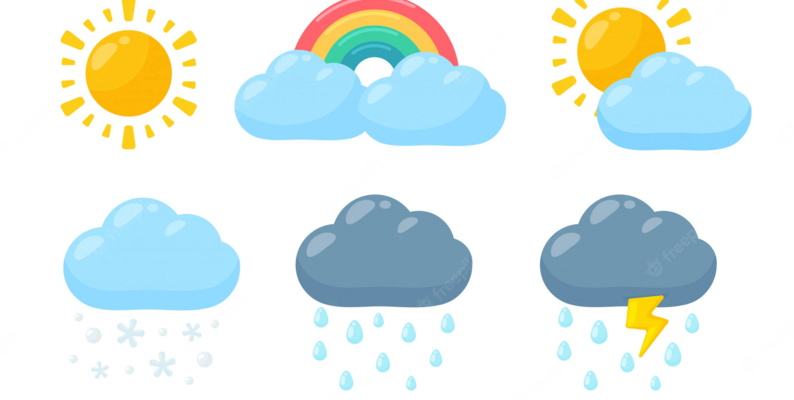

https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset

Python Project for Data Analytics(Beginners)
(A part of Big Data Analysis)
The Weather Dataset

Description:
The Weather Dataset is a time-series dataset with per-hour information about the weather condition at a particular location. It records Temperature, dew Point temperature, Relative humidity, Wind speed, Visibility, Pressure and conditions.
This Dataset available as a csv file. We are going to analyze this dataset using Pandas dataPython Project for Data Analytics (Beginners)

Workflow:

Import library
Analyzing the data
Solve few questions on Data Analytics

# Libraries Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
import kagglehub

In [4]:
import os
import math
import re

In [5]:
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [6]:
from tensorflow.keras.layers import Input, Dense,Add
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [7]:
import pickle

def save_obj(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)        

def load_obj(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

# Dataset Import

In [8]:
kaggle_path = kagglehub.dataset_download("swatikhedekar/python-project-on-weather-dataset")

print("Path to dataset files:", kaggle_path)

Path to dataset files: C:\Users\yosef\.cache\kagglehub\datasets\swatikhedekar\python-project-on-weather-dataset\versions\8


In [9]:
df = pd.read_csv(os.path.join(kaggle_path, "Weather Data.csv"))

# Dataset Exploration

In [10]:
pd.concat([df.head(), df.tail()])

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [11]:
df.describe(include='all')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,12/31/2012 7:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


# Data Preprocessing

Types

In [13]:
pd.DataFrame([df.columns, df.dtypes])

,0,1,2,3,4,5,6,7
0,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
1,object,float64,float64,int64,int64,float64,float64,object


In [14]:
FEATURES_INPUT = ['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

FEATURE_TARGET = 'Weather'

FEATURES_INPUT_NUMERICAL = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

FEATURES_INPUT_CATEGORICAL = []

FEATURES_INPUT_TIME = ['Date/Time']

In [15]:
df[FEATURES_INPUT_NUMERICAL] = df[FEATURES_INPUT_NUMERICAL].astype(float)
df[FEATURES_INPUT_CATEGORICAL] = df[FEATURES_INPUT_CATEGORICAL].astype(str)
df[FEATURE_TARGET] = df[FEATURE_TARGET].astype(str)

for time_feature in FEATURES_INPUT_TIME:
    df[time_feature] = pd.to_datetime(df[time_feature])


In [16]:
pd.DataFrame([df.columns, df.dtypes])

,0,1,2,3,4,5,6,7
0,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
1,datetime64[ns],float64,float64,float64,float64,float64,float64,object


Null Values

In [17]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Dublicates

In [18]:
df.duplicated().sum()

np.int64(0)

target values

In [19]:
N_COUNT = 3 
count_values = df[FEATURE_TARGET].value_counts()
for i,v in enumerate(df[FEATURE_TARGET].unique()):
    print(f"{i+1:2d}. {v:40s} {count_values[v]:4d}#   ", end='')
    if (i+1) % N_COUNT==0:
        print('')

 1. Fog                                       150#    2. Freezing Drizzle,Fog                        6#    3. Mostly Cloudy                            2069#   
 4. Cloudy                                   1728#    5. Rain                                      306#    6. Rain Showers                              188#   
 7. Mainly Clear                             2106#    8. Snow Showers                               60#    9. Snow                                      390#   
10. Clear                                    1326#   11. Freezing Rain,Fog                           4#   12. Freezing Rain                              14#   
13. Freezing Drizzle                            7#   14. Rain,Snow                                  18#   15. Moderate Snow                               4#   
16. Freezing Drizzle,Snow                      11#   17. Freezing Rain,Snow Grains                   1#   18. Snow,Blowing Snow                          19#   
19. Freezing Fog                        

In [20]:
def replace_target(old_str,new_str):
    def replacer(val):
        val = str(val).lower().strip()
        val = val.replace(old_str.lower(), new_str.lower())
        return val

    df[FEATURE_TARGET] = df[FEATURE_TARGET].apply(replacer)

In [21]:
replace_target('Mainly', '')
replace_target('Mostly','')
replace_target('Freezing','')
replace_target('Heavy','')
replace_target('Moderate','')
replace_target('pellets','')
replace_target('showers','')
replace_target('blowing','')
replace_target('haze','fog')

replace_target(' ','')
replace_target(' ','')

replace_target('snow,snow','snow')
replace_target('drizzle','rain')
replace_target('snowgrains','snow')

In [22]:
N_COUNT = 3 
count_values = df[FEATURE_TARGET].value_counts()
for i,v in enumerate(df[FEATURE_TARGET].unique()):
    print(f"{i+1:2d}. {v:40s} {count_values[v]:4d}#   ", end='')
    if (i+1) % N_COUNT==0:
        print('')

 1. fog                                       170#    2. rain,fog                                  216#    3. cloudy                                   3797#   
 4. rain                                      556#    5. clear                                    3432#    6. snow                                      476#   
 7. rain,snow                                  35#    8. snow,fog                                   46#    9. snow,ice                                    6#   
10. thunderstorms,rain                         20#   11. thunderstorms,rain,fog                      5#   12. thunderstorms                               2#   
13. rain,snow,fog                              16#   14. rain,ice,fog                                2#   15. rain,ice                                    1#   
16. rain,snow,ice                               4#   

In [23]:
THRESHOLD_MIN = 450
THRESHOLD_MAX = 500
selected_indices_to_remove = set()

count_values = df[FEATURE_TARGET].value_counts()
for weather_state, count_val in zip(count_values.index,count_values):
    if count_val < THRESHOLD_MIN:
        df = df[ df[FEATURE_TARGET] != weather_state ]

    if count_val > THRESHOLD_MAX:
        count_to_remove = count_val - THRESHOLD_MAX
        selected_indices = df[df[FEATURE_TARGET] == weather_state].index
        selected_indices_to_remove.update(np.random.choice(selected_indices, count_to_remove, replace=False))

df.drop(index=list(selected_indices_to_remove), inplace=True)

In [24]:
N_COUNT = 3 
count_values = df[FEATURE_TARGET].value_counts()
for i,v in enumerate(df[FEATURE_TARGET].unique()):
    print(f"{i+1:2d}. {v:40s} {count_values[v]:4d}#   ", end='')
    if (i+1) % N_COUNT==0:
        print('')

 1. rain                                      500#    2. cloudy                                    500#    3. snow                                      476#   
 4. clear                                     500#   

# Data Visulaization

In [25]:
plt.style.use(plt.style.available[12])

Kde

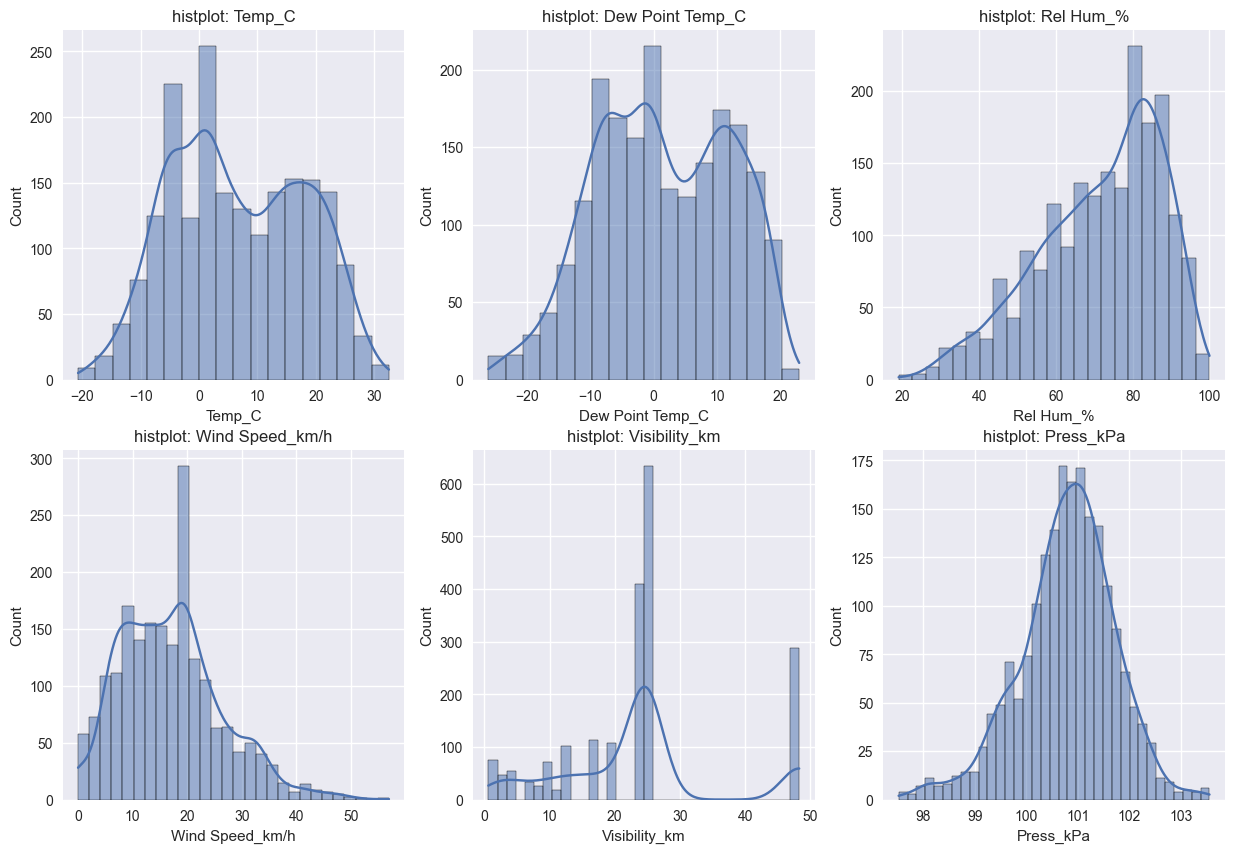

In [26]:
N_COUNT = 3

plt.figure(figsize=(15,10))
for i, feature in enumerate(FEATURES_INPUT_NUMERICAL):
    plt.subplot( math.ceil(len(FEATURES_INPUT_NUMERICAL)/N_COUNT) , N_COUNT, i+1)
    plt.title(f"histplot: {feature}")
    sns.histplot(df, x=feature, kde=True)

plt.show()

Count

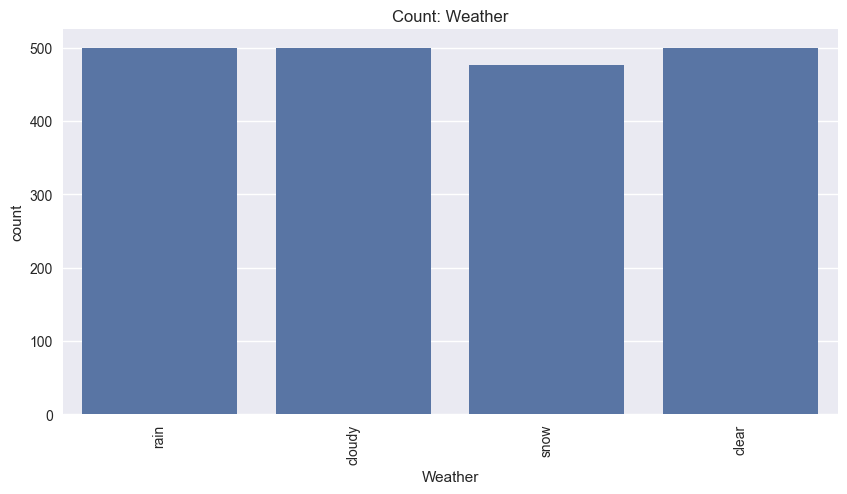

In [27]:
plt.figure(figsize=(10,5))

plt.title(f"Count: {FEATURE_TARGET}")
sns.countplot(df, x=FEATURE_TARGET,)
plt.xticks(rotation=90)
plt.show()

line

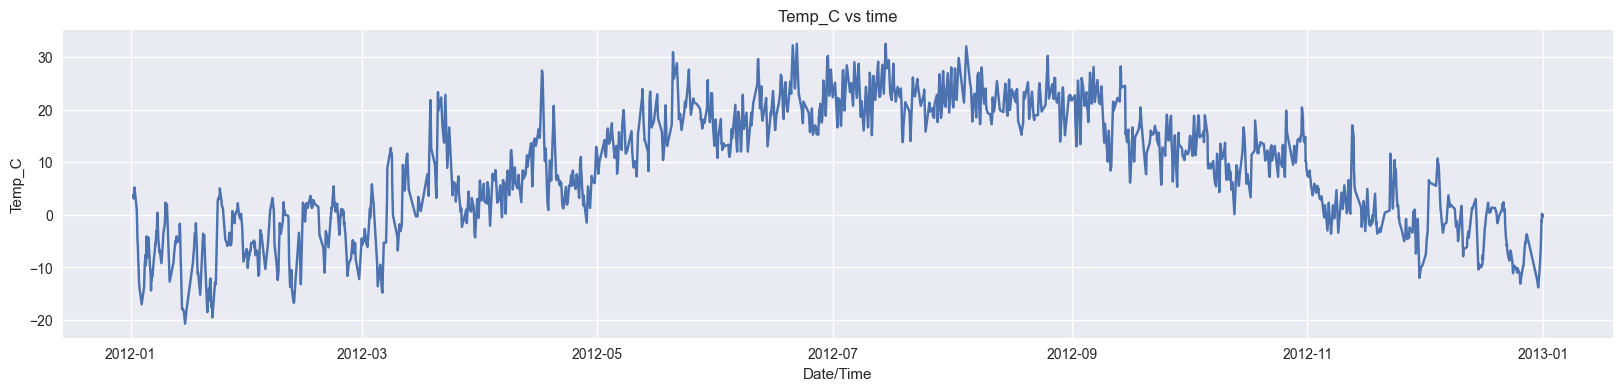

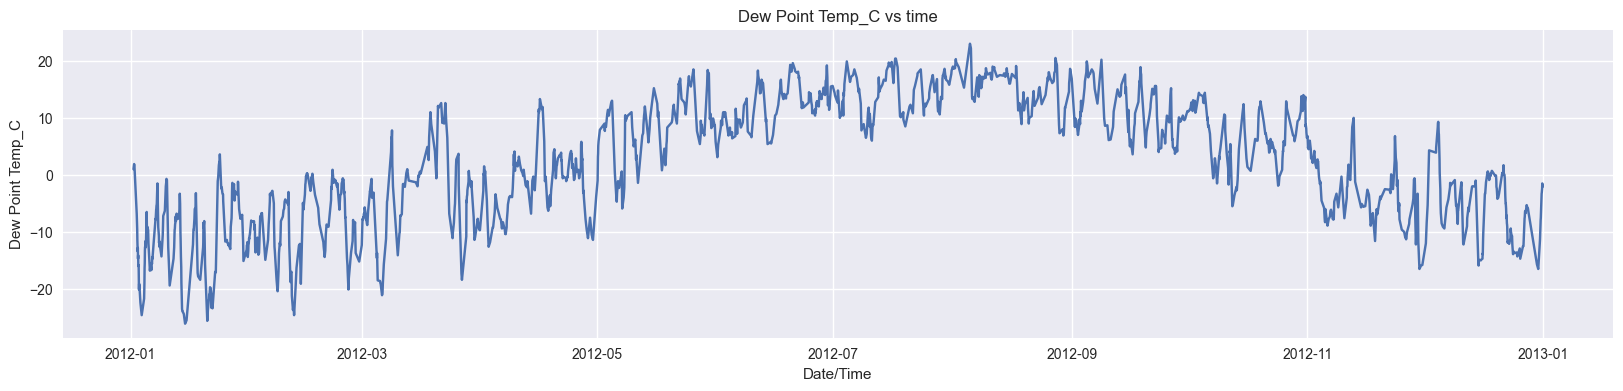

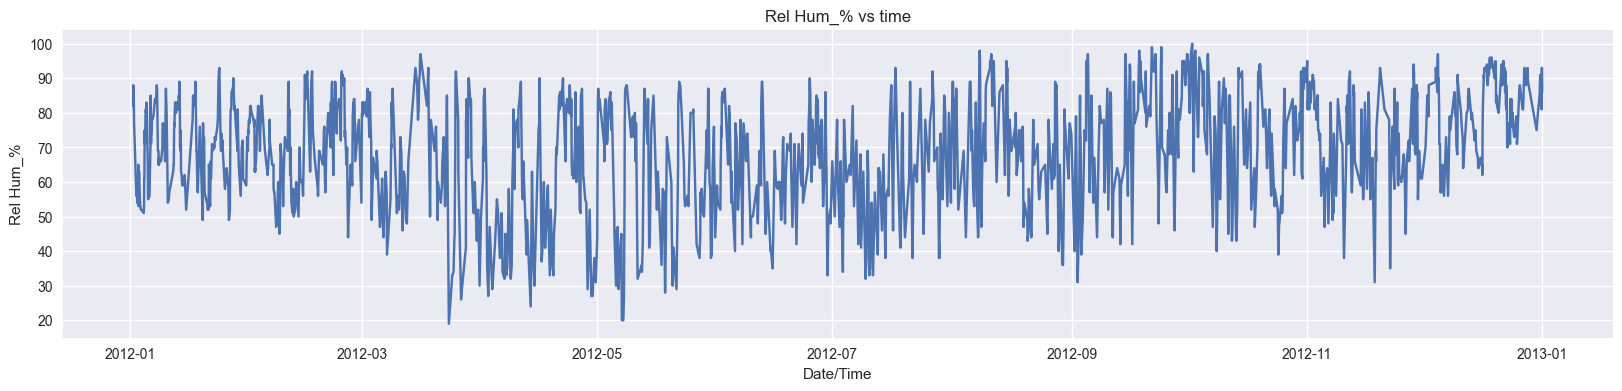

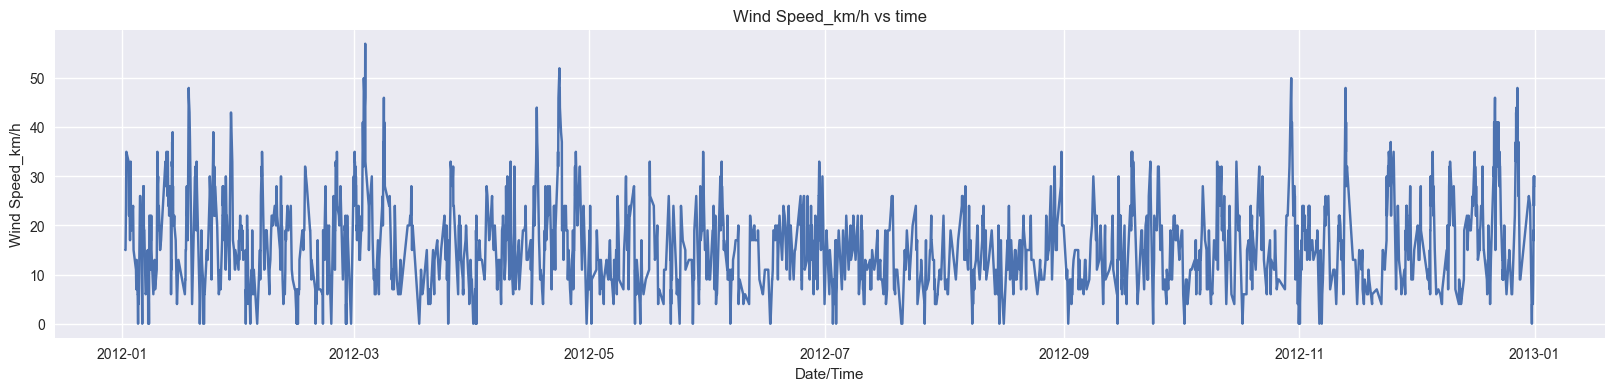

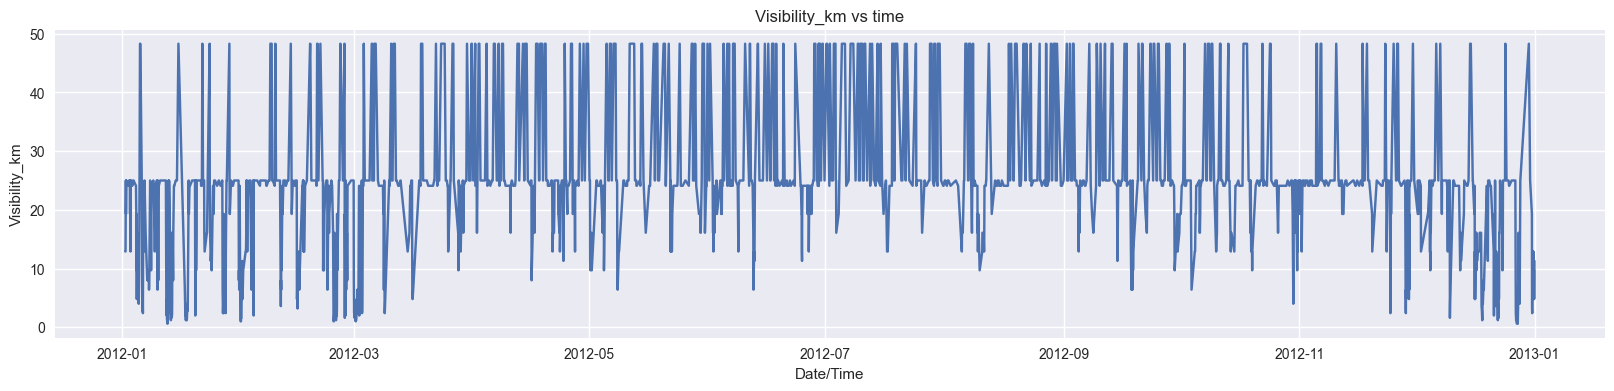

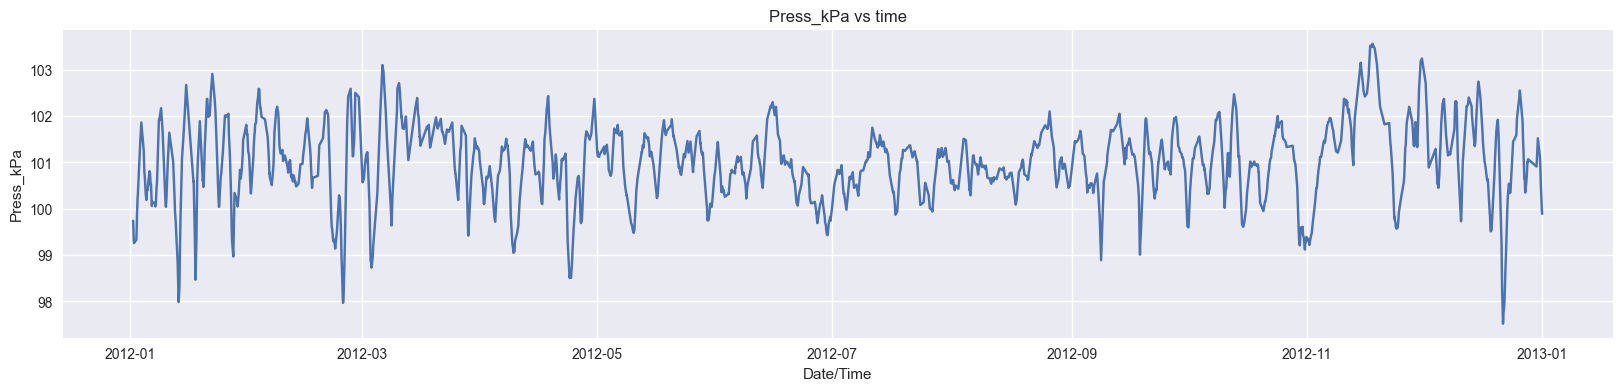

In [28]:
for i, feature in enumerate(FEATURES_INPUT_NUMERICAL):
    plt.figure(figsize=(20,4))
    plt.title(f"{feature} vs time")
    sns.lineplot(df, x=FEATURES_INPUT_TIME[0], y=feature)
    plt.show()

# Outlier

In [29]:
def plot_box(features, hue):
    ROW_WIDTH = 3
    temp = 0

    for num_feature in features:
        if temp == 0:
            plt.figure(figsize=(25,7))

        plt.subplot(1,ROW_WIDTH, temp + 1)
        plt.title(f"Box plot: {num_feature}")
        sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

        if temp == ROW_WIDTH - 1:
            plt.show()

        temp = (temp + 1) % ROW_WIDTH

    if temp != ROW_WIDTH - 1:
        plt.show()    

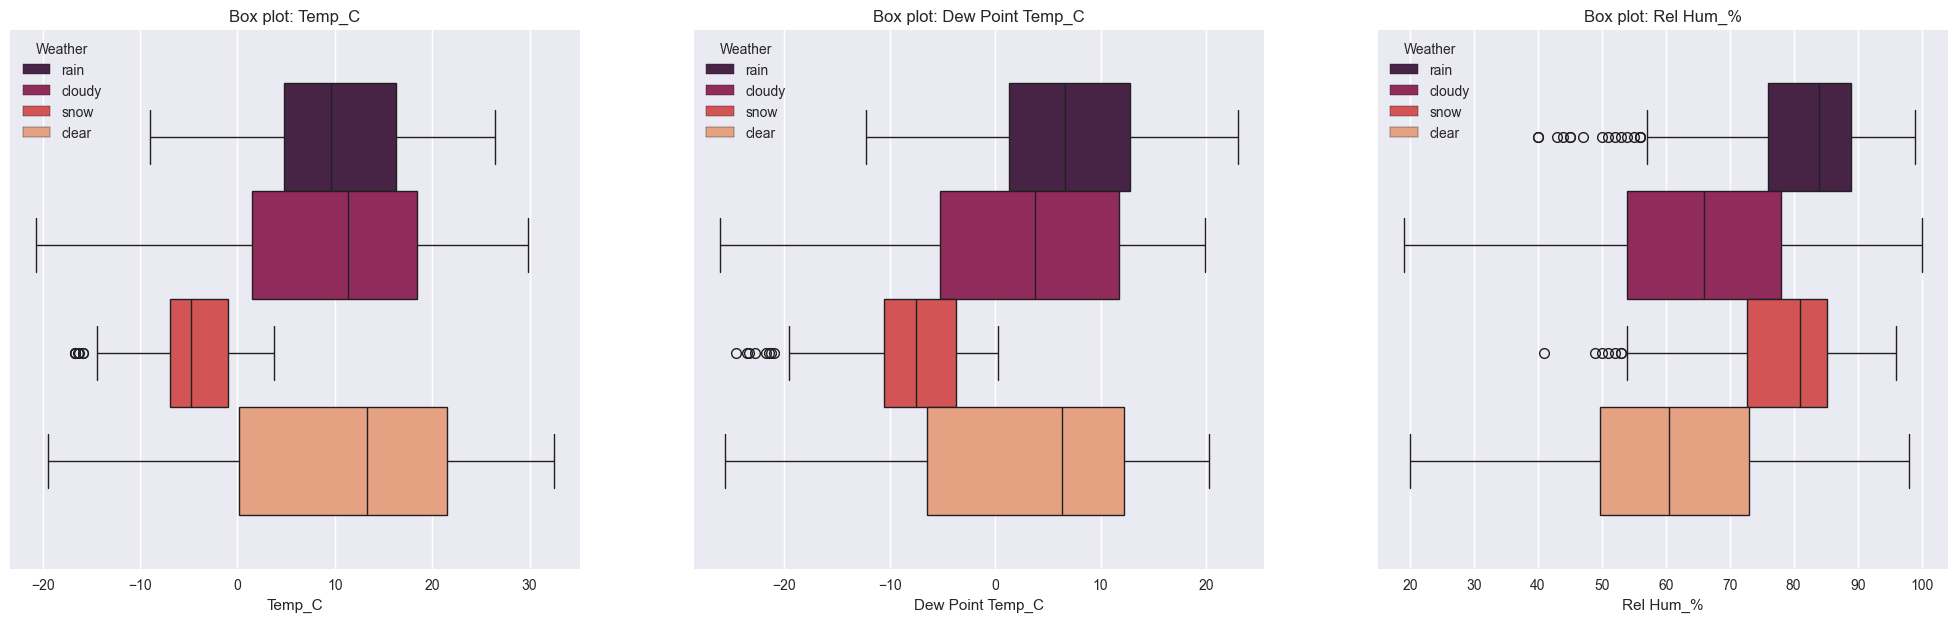

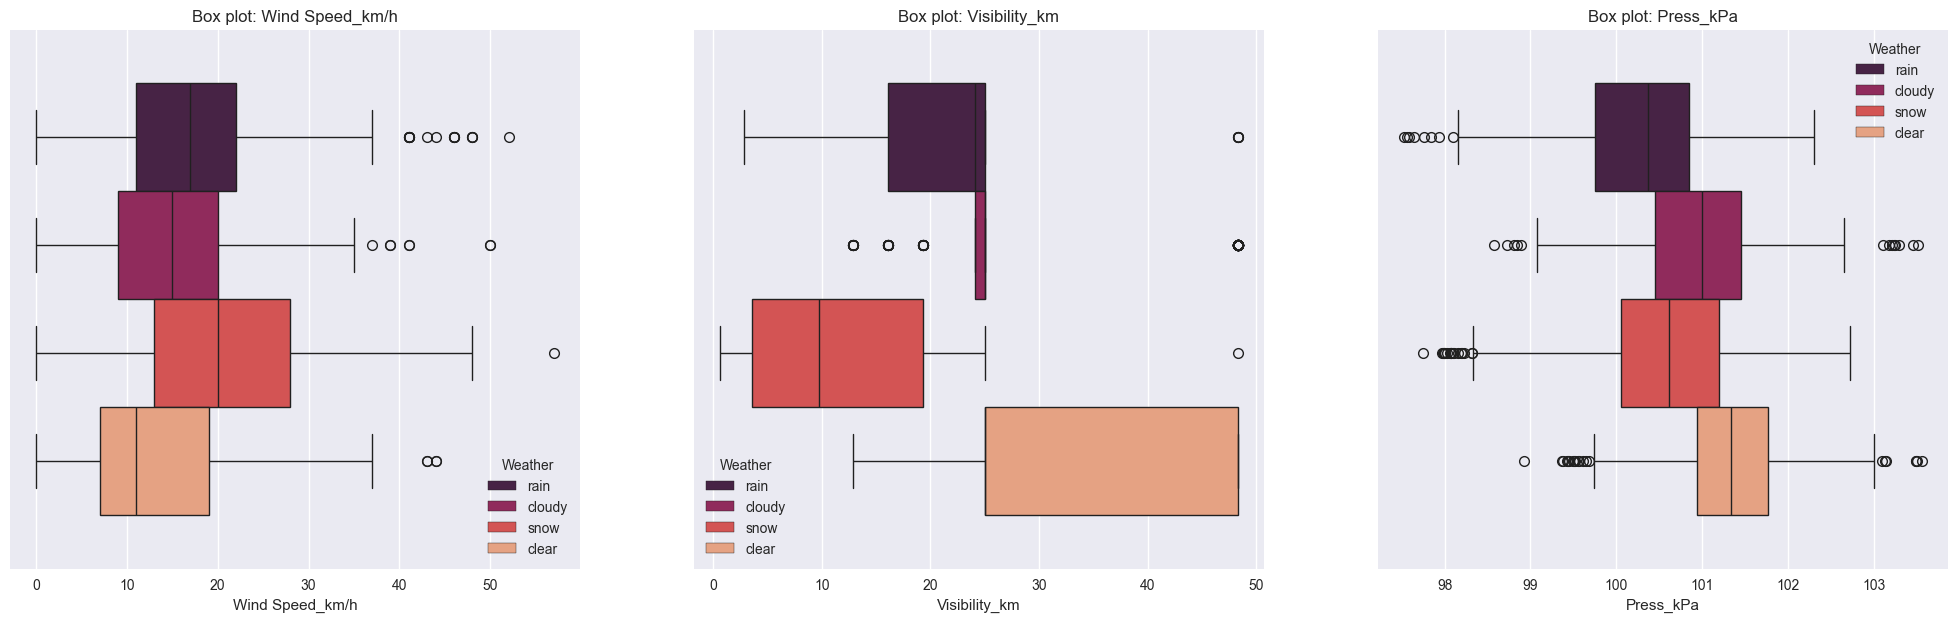

In [30]:
plot_box(FEATURES_INPUT_NUMERICAL, FEATURE_TARGET)

In [31]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [32]:
for num_feature in FEATURES_INPUT_NUMERICAL:
    for gender_category in set(df[FEATURE_TARGET].values):
        mask = df[FEATURE_TARGET] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

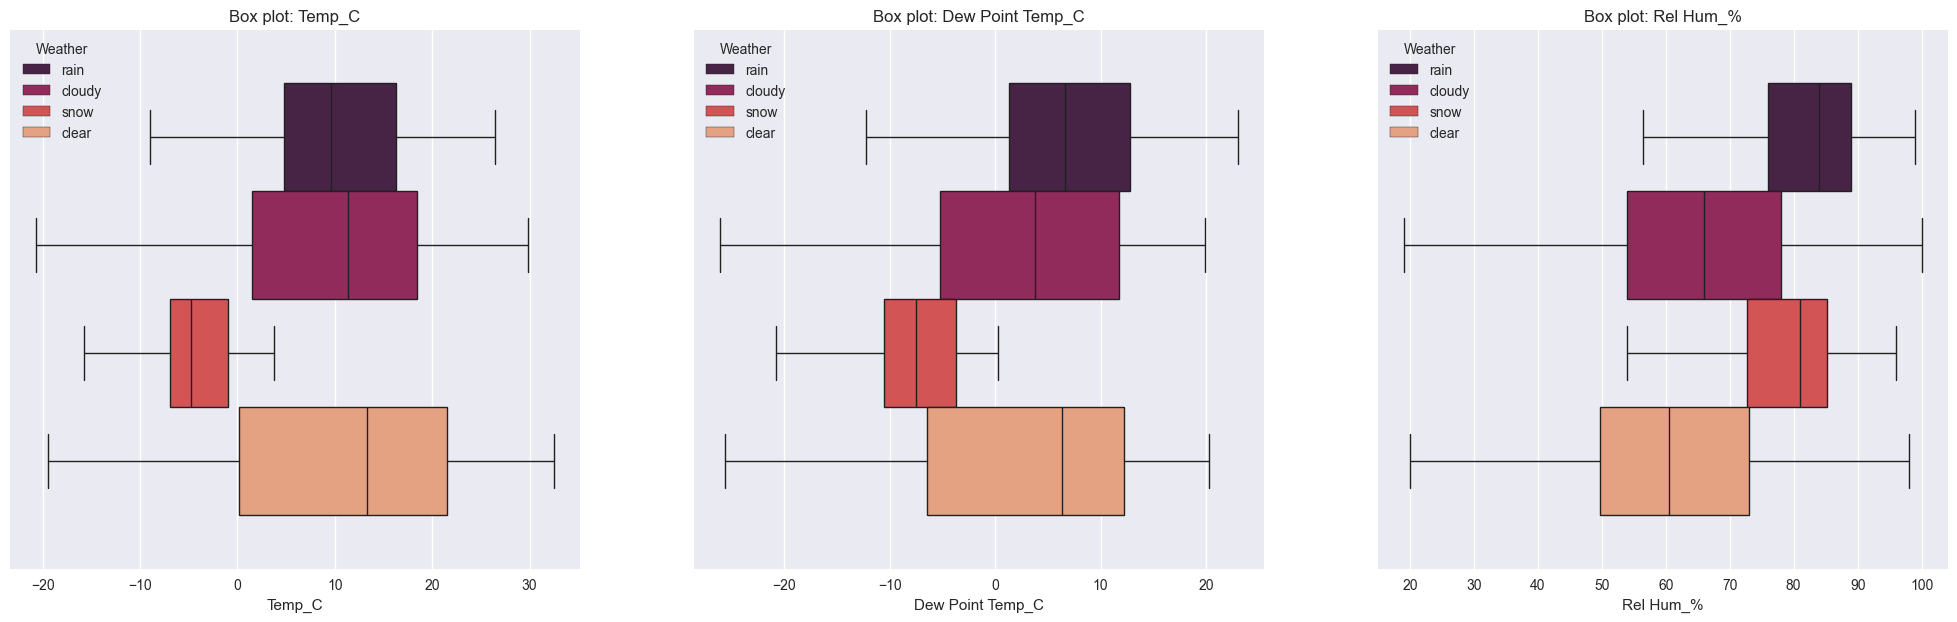

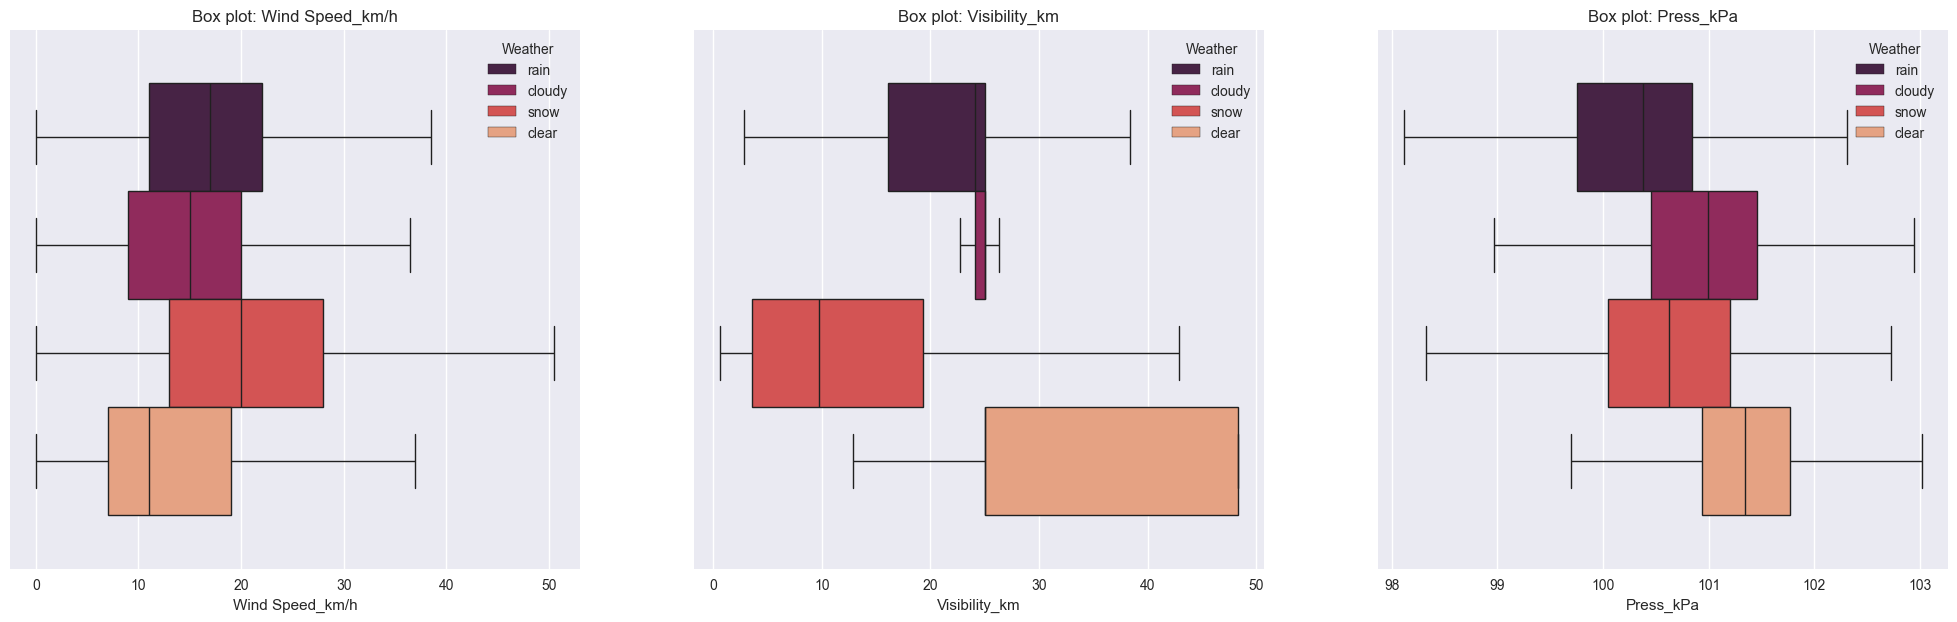

In [33]:
plot_box(FEATURES_INPUT_NUMERICAL, FEATURE_TARGET)

# Feature Engineering

In [34]:
FEATURES_INPUT

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

In [35]:
new_feature_name = 'month'
df[new_feature_name] = df[FEATURES_INPUT_TIME[0]].apply(lambda row: row.month)

if new_feature_name not in FEATURES_INPUT:
    FEATURES_INPUT.append(new_feature_name)

if new_feature_name not in FEATURES_INPUT_CATEGORICAL:
    FEATURES_INPUT_CATEGORICAL.append(new_feature_name)

In [36]:
new_feature_name = 'day'
df[new_feature_name] = df[FEATURES_INPUT_TIME[0]].apply(lambda row: (row.month - 1) * 30.0 + row.day)

if new_feature_name not in FEATURES_INPUT:
    FEATURES_INPUT.append(new_feature_name)

if new_feature_name not in FEATURES_INPUT_NUMERICAL:
    FEATURES_INPUT_NUMERICAL.append(new_feature_name)

In [ ]:
new_feature_name = 'year_quarter'

def month_to_season(month):   
    month = month.month 
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        raise f'Invalid month: {month}'
    
df[new_feature_name] = df[FEATURES_INPUT_TIME[0]].apply(month_to_season)

if new_feature_name not in FEATURES_INPUT:
    FEATURES_INPUT.append(new_feature_name)

if new_feature_name not in FEATURES_INPUT_CATEGORICAL:
    FEATURES_INPUT_CATEGORICAL.append(new_feature_name)

In [38]:
new_feature_name = 'am-!pm'
    
df[new_feature_name] = df[FEATURES_INPUT_TIME[0]].apply(lambda x: float(x.hour in range(6,18)))

if new_feature_name not in FEATURES_INPUT:
    FEATURES_INPUT.append(new_feature_name)

if new_feature_name not in FEATURES_INPUT_CATEGORICAL:
    FEATURES_INPUT_CATEGORICAL.append(new_feature_name)

In [39]:
pd.concat([df.head(), df.tail()])

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month,day,year_quarter,am-!pm
18,2012-01-01 18:00:00,3.8,1.0,82.0,15.0,12.9,99.74,rain,1,1.0,Winter,0.0
19,2012-01-01 19:00:00,3.1,1.3,88.0,15.0,12.9,99.68,rain,1,1.0,Winter,0.0
21,2012-01-01 21:00:00,4.0,1.7,85.0,20.0,25.0,99.39,cloudy,1,1.0,Winter,0.0
22,2012-01-01 22:00:00,4.4,1.9,84.0,24.0,19.3,99.32,rain,1,1.0,Winter,0.0
24,2012-01-02 00:00:00,5.2,1.5,77.0,35.0,25.0,99.26,rain,1,2.0,Winter,0.0
8779,2012-12-31 19:00:00,0.1,-2.7,81.0,30.0,9.7,100.13,snow,12,361.0,Winter,0.0
8780,2012-12-31 20:00:00,0.2,-2.4,83.0,24.0,9.7,100.03,snow,12,361.0,Winter,0.0
8781,2012-12-31 21:00:00,-0.5,-1.5,93.0,28.0,4.8,99.95,snow,12,361.0,Winter,0.0
8782,2012-12-31 22:00:00,-0.2,-1.8,89.0,28.0,9.7,99.91,snow,12,361.0,Winter,0.0
8783,2012-12-31 23:00:00,0.0,-2.1,86.0,30.0,11.3,99.89,snow,12,361.0,Winter,0.0


# Correlation Matrix

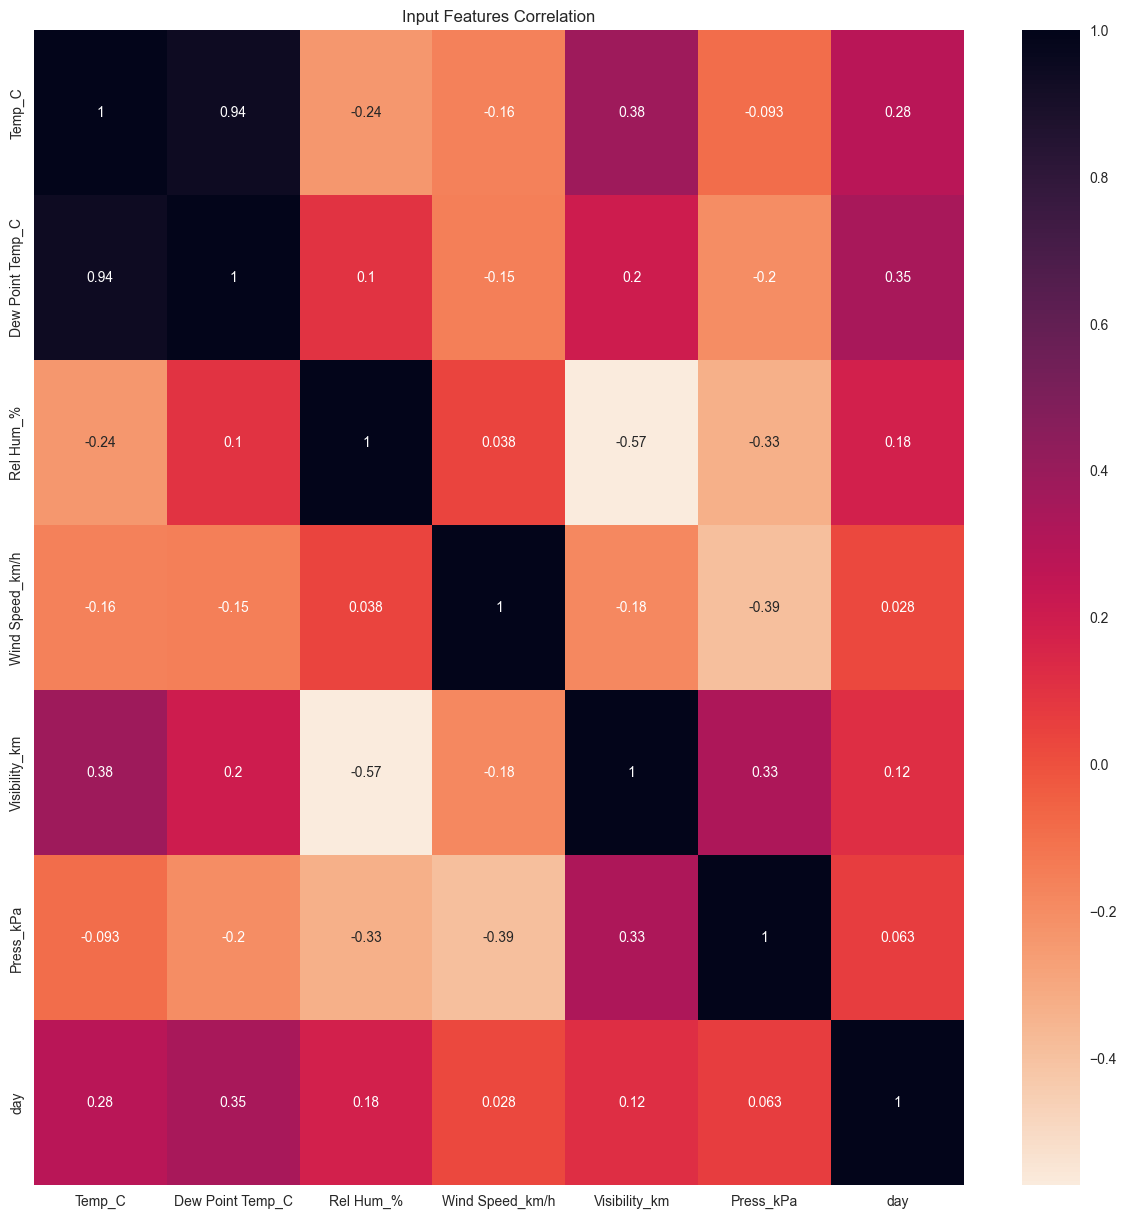

In [40]:
plt.figure(figsize=(15, 15)) 

plt.title("Input Features Correlation")

sns.heatmap( 
    df[FEATURES_INPUT_NUMERICAL].corr(),
    annot=True,
    cmap='rocket_r',
    )

plt.show()

In [41]:
FEATURES_INPUT

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'month',
 'day',
 'year_quarter',
 'am-!pm']

F-value: Measures how much the means between groups differ relative to the variance within the groups. Higher = more likely the feature is important.

p-value: Probability that the observed difference is due to chance.

p < 0.05 → Statistically significant

p ≥ 0.05 → Not significant

In [42]:
f_values, p_values = f_classif(df[FEATURES_INPUT_NUMERICAL], df[FEATURE_TARGET])

for i in range(len(FEATURES_INPUT_NUMERICAL)):
    print(f"{FEATURES_INPUT_NUMERICAL[i]:17s}: F-value = {f_values[i]:8.3f}, p-value = {p_values[i]:3.3f}")

Temp_C           : F-value =  288.303, p-value = 0.000
Dew Point Temp_C : F-value =  235.579, p-value = 0.000
Rel Hum_%        : F-value =  272.403, p-value = 0.000
Wind Speed_km/h  : F-value =   66.094, p-value = 0.000
Visibility_km    : F-value =  604.464, p-value = 0.000
Press_kPa        : F-value =  163.399, p-value = 0.000
day              : F-value =   34.093, p-value = 0.000


# Encoding & Scaling

In [43]:
trainable_df = df.copy()

In [44]:
trainable_df.drop(FEATURES_INPUT_TIME, axis=1, inplace=True);

In [45]:
trainable_df = pd.get_dummies(trainable_df, columns=['year_quarter'], drop_first=False, dtype=int)

In [46]:
label_encoder = LabelEncoder()
trainable_df[FEATURE_TARGET] = label_encoder.fit_transform(trainable_df[FEATURE_TARGET])

In [79]:
print(f"{FEATURES_INPUT_NUMERICAL=}")

FEATURES_INPUT_NUMERICAL=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'day']


In [47]:
standard_scaller = StandardScaler()

standard_scaller.fit(trainable_df[FEATURES_INPUT_NUMERICAL])

StandardScaler()

In [48]:
trainable_df.loc[:,FEATURES_INPUT_NUMERICAL] = standard_scaller.transform(trainable_df[FEATURES_INPUT_NUMERICAL])

In [49]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month,day,year_quarter,am-!pm
18,2012-01-01 18:00:00,3.8,1.0,82.0,15.0,12.9,99.74,rain,1,1.0,Winter,0.0
19,2012-01-01 19:00:00,3.1,1.3,88.0,15.0,12.9,99.68,rain,1,1.0,Winter,0.0
21,2012-01-01 21:00:00,4.0,1.7,85.0,20.0,25.0,99.39,cloudy,1,1.0,Winter,0.0
22,2012-01-01 22:00:00,4.4,1.9,84.0,24.0,19.3,99.32,rain,1,1.0,Winter,0.0
24,2012-01-02 00:00:00,5.2,1.5,77.0,35.0,25.0,99.26,rain,1,2.0,Winter,0.0


In [50]:
trainable_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month,day,am-!pm,year_quarter_Autumn,year_quarter_Spring,year_quarter_Summer,year_quarter_Winter
18,-0.250780,-0.037699,0.654867,-0.207285,-0.874991,-1.170734,2,1,-1.502408,0.0,0,0,0,1
19,-0.312713,-0.009041,1.031363,-0.207285,-0.874991,-1.237259,2,1,-1.502408,0.0,0,0,0,1
21,-0.233085,0.029171,0.843115,0.342065,0.237921,-1.558799,1,1,-1.502408,0.0,0,0,0,1
22,-0.197695,0.048277,0.780365,0.781545,-0.286343,-1.636412,2,1,-1.502408,0.0,0,0,0,1
24,-0.126914,0.010065,0.341120,1.990114,0.237921,-1.702937,2,1,-1.493547,0.0,0,0,0,1


# Dataset Splitting

In [51]:
X_train,X_test, y_train, y_test = train_test_split( 
    trainable_df.drop(FEATURE_TARGET, axis=1), 
    trainable_df.loc[:, FEATURE_TARGET],
    test_size=0.25,
    random_state=41,
    stratify=trainable_df.loc[:, FEATURE_TARGET],
  )

In [52]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (1482, 13)
y_train.shape= (1482,)
X_test.shape= (494, 13)
y_test.shape= (494,)


In [53]:
y_train.value_counts()

Weather
2    375
0    375
1    375
3    357
Name: count, dtype: int64

In [54]:
y_test.value_counts()

Weather
2    125
1    125
0    125
3    119
Name: count, dtype: int64

# Deep Model Class Defination

In [55]:
CACHE_MODELS_DIR_NAME = 'models_cache' 
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [56]:
class CustomModel:
    def __init__(self, name, model):

        self.name = str(name)
        self.model = model

        self.y_train_hat = None
        self.y_test_hat = None
        
        self.load()

    def fit(self, x_train, y_train, epochs ,validation_split,force_train= False):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'

        es = EarlyStopping(
            monitor='val_loss',      
            patience=5,              
            verbose=1,              
            restore_best_weights=True   
        )
        
        mcp = ModelCheckpoint(
            filepath=file_path,    
            monitor='val_loss',           
            save_best_only=True,          
            save_weights_only=False,      
            mode='min',                  
            verbose=1   
        )

        if self.trained == False or force_train:
            self.model.fit(x_train, y_train, callbacks=[es, mcp], epochs =epochs, validation_split=validation_split)
            self.trained = True

            self.history = self.model.history

            file_history_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '_history.pickle'
            save_obj(self.history ,file_history_path)
    
    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            self.y_train_hat = self.model.predict(x_train)
            self.y_train_hat = np.argmax(self.y_train_hat, axis=1)
    
    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            self.y_test_hat = self.model.predict(x_test)
            self.y_test_hat = np.argmax(self.y_test_hat, axis=1)

    def save(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'
        self.model.save(file_path)       

    def load(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.keras'

        if os.path.exists(file_path):
            self.model = load_model(file_path)
            self.trained = True
            print(F'Model {self.name} loaded from cache')
        else:
            self.trained = False

        file_history_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '_history.pickle'
        if os.path.exists(file_history_path):
            self.history = load_obj(file_history_path)

            self.model.history = self.history

# Deep Classes

In [57]:
models_list = []

In [58]:
def build_model_1(name): 
    input_layer_1 = Input(shape= X_train.shape[1:])

    hidden_1_1 = Dense(units=32, activation='relu')(input_layer_1)
    hidden_1_2 = Dense(units=8, activation='relu')(hidden_1_1)
    output_layer_1 = Dense(units= len(set(y_test)) , activation='softmax')(hidden_1_2)

    model_1 = Model(input_layer_1, output_layer_1, name=name)

    model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_1


models_list.append(CustomModel('deep_1',build_model_1('deep_1')))
models_list[-1].model.summary()

Model deep_1 loaded from cache


Model: "deep_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246 (8.78 KB)

 Trainable params: 748 (2.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,498 (5.86 KB)

In [59]:
def build_model_2(name): 
    input_layer_2 = Input(shape= X_train.shape[1:])

    hidden_2_1 = Dense(units=16, activation='relu')(input_layer_2)
    output_layer_2 = Dense(units= len(set(y_test)) , activation='softmax')(hidden_2_1)

    model_2 = Model(input_layer_2, output_layer_2, name=name)

    model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_2

models_list.append(CustomModel('deep_2',build_model_2('deep_2')))
models_list[-1].model.summary()

Model deep_2 loaded from cache


Model: "deep_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878 (3.43 KB)

 Trainable params: 292 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 586 (2.29 KB)

In [60]:
def build_model_3(name): 
    input_layer = Input(shape= X_train.shape[1:])

    hidden_1 = Dense(units=32, activation='relu')(input_layer)
    hidden_2 = Dense(units=16, activation='elu')(hidden_1)
    hidden_3 = Dense(units=8, activation='relu')(hidden_2)

    skip_1 = Dense(units=8, activation='relu')(hidden_1)

    hidden_total = Add()([hidden_3, skip_1])

    output_layer = Dense(units= len(set(y_test)) , activation='softmax')(hidden_total)

    model = Model(input_layer, output_layer, name=name)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

models_list.append(CustomModel('deep_3',build_model_3('deep_3')))
models_list[-1].model.summary()

Model deep_3 loaded from cache


Model: "deep_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 32)        │        448 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 16)        │        528 │ dense_57[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 8)         │        136 │ dense_58[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 8)         │        264 │ dense_57[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 8)         │          0 │ dense_59[0][0],   │
│                     │                   │            │ dense_60[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 4)         │         36 │ add_7[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,238 (16.56 KB)

 Trainable params: 1,412 (5.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,826 (11.04 KB)

In [61]:
def build_model_4(name): 
    input_layer = Input(shape= X_train.shape[1:])

    hidden_1 = Dense(units=32, activation='elu')(input_layer)
    hidden_2 = Dense(units=16, activation='elu')(hidden_1)
    hidden_3 = Dense(units=8, activation='elu')(hidden_2)

    skip_1 = Dense(units=8, activation='elu')(hidden_1)

    hidden_total = Add()([skip_1, hidden_3])

    output_layer = Dense(units= len(set(y_test)) , activation='softmax')(hidden_total)

    model = Model(input_layer, output_layer, name=name)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

models_list.append(CustomModel('deep_4',build_model_4('deep_4')))
models_list[-1].model.summary()

Model deep_4 loaded from cache


Model: "deep_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 32)        │        448 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 16)        │        528 │ dense_62[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 8)         │        264 │ dense_62[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 8)         │        136 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 8)         │          0 │ dense_65[0][0],   │
│                     │                   │            │ dense_64[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 4)         │         36 │ add_8[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,238 (16.56 KB)

 Trainable params: 1,412 (5.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,826 (11.04 KB)

In [62]:
def build_model_5(name): 
    input_layer = Input(shape= X_train.shape[1:])

    hidden_1 = Dense(units=32, activation='tanh')(input_layer)
    hidden_2 = Dense(units=16, activation='tanh')(hidden_1)
    hidden_3 = Dense(units=8, activation='tanh')(hidden_2)

    skip_1 = Dense(units=8, activation='relu')(hidden_1)

    hidden_total = Add()([skip_1, hidden_3])

    output_layer = Dense(units= len(set(y_test)) , activation='softmax')(hidden_total)

    model = Model(input_layer, output_layer, name=name)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

models_list.append(CustomModel('deep_5',build_model_5('deep_5')))
models_list[-1].model.summary()

Model deep_5 loaded from cache


Model: "deep_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 32)        │        448 │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 16)        │        528 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 8)         │        264 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 8)         │        136 │ dense_83[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 8)         │          0 │ dense_85[0][0],   │
│                     │                   │            │ dense_84[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 4)         │         36 │ add_11[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,238 (16.56 KB)

 Trainable params: 1,412 (5.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,826 (11.04 KB)

# Model Training

In [63]:
for i, model in enumerate(models_list):
    print(f"{i+1}. Train: {model.name}")
    model.fit(X_train,y_train, epochs =100, validation_split=0.1, force_train=False)
    print('\n')

1. Train: deep_1


2. Train: deep_2


3. Train: deep_3


4. Train: deep_4


5. Train: deep_5




history

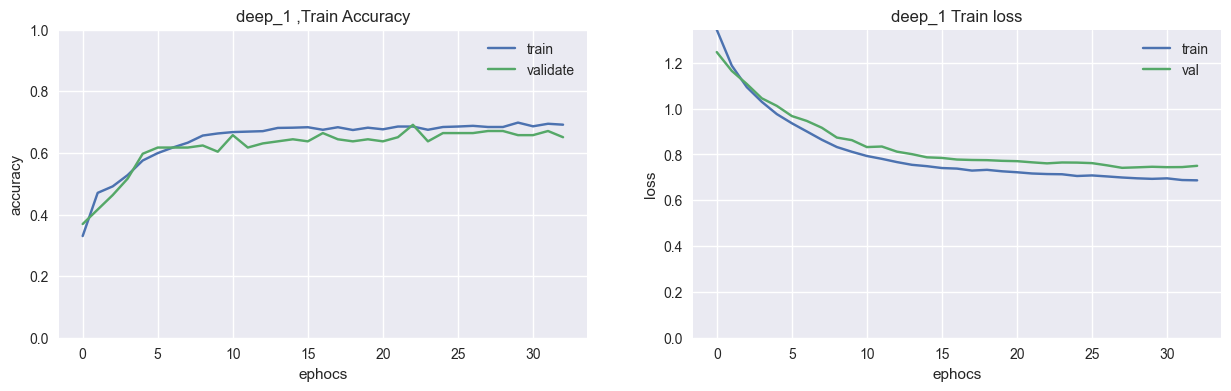

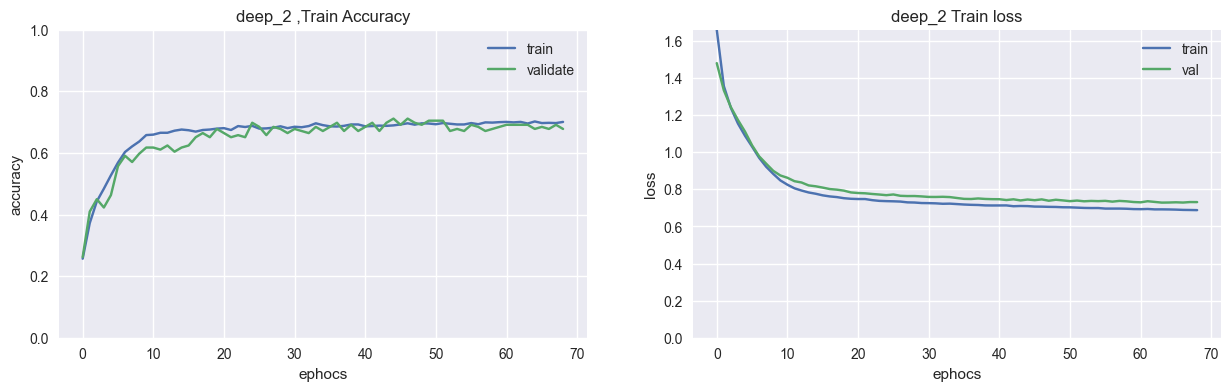

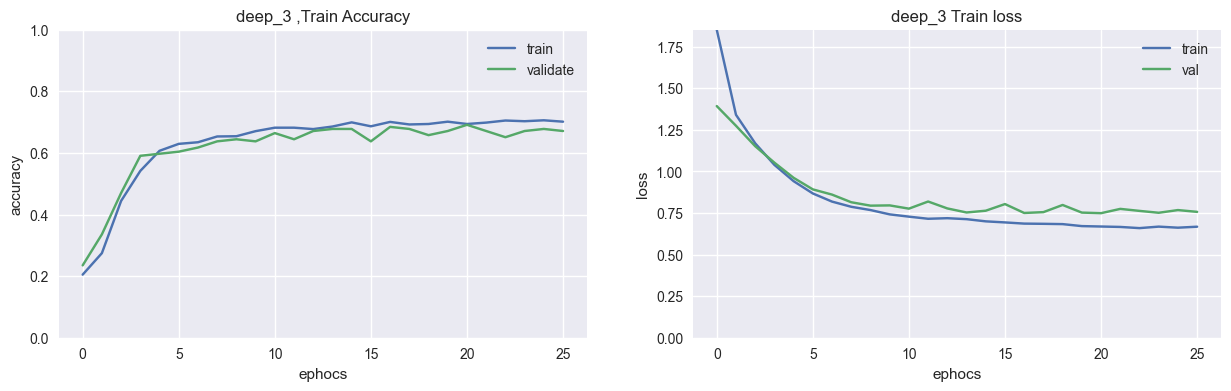

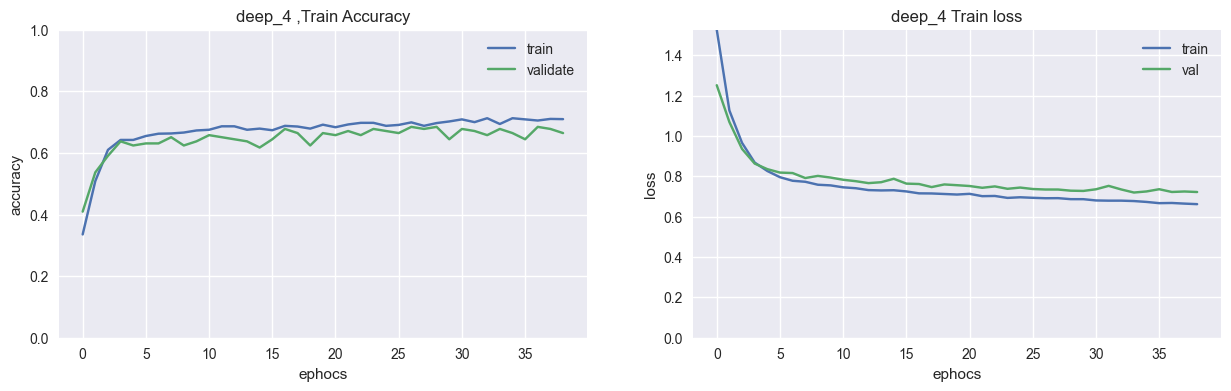

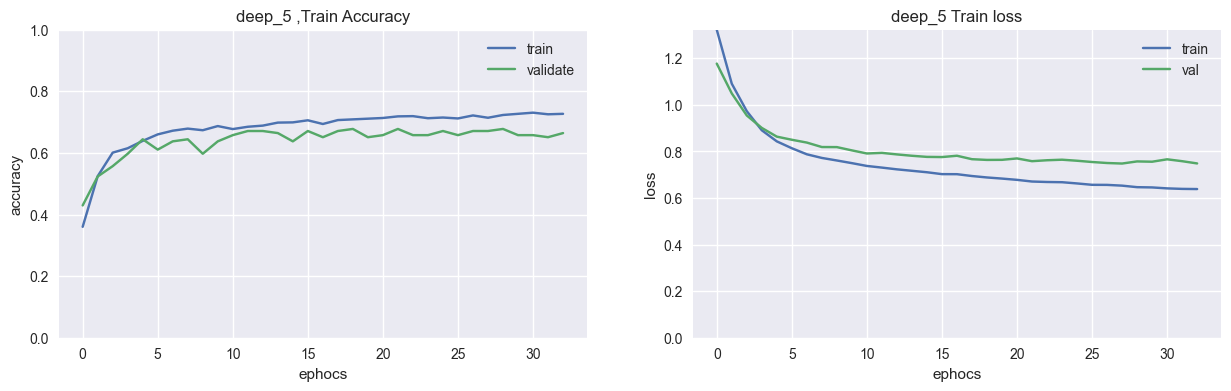

In [64]:
for i, model in enumerate(models_list):
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    plt.title(f"{model.name} ,Train Accuracy")
    plt.ylabel('accuracy')
    plt.xlabel('ephocs')
    plt.plot(model.history.history['accuracy'], label='train')
    plt.plot(model.history.history['val_accuracy'], label='validate')
    plt.ylim(0,1)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title(f"{model.name} Train loss")
    plt.ylabel('loss')
    plt.xlabel('ephocs')
    plt.plot(model.history.history['loss'], label='train')
    plt.plot(model.history.history['val_loss'], label='val')
    plt.ylim(0, max(max(model.history.history['val_loss']) , max(model.history.history['loss'])) )
    plt.legend()
    plt.show()

# Model Evaluation

In [65]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/5. Predict deep_1 on train data
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  2/5. Predict deep_2 on train data
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  3/5. Predict deep_3 on train data
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  4/5. Predict deep_4 on train data
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  5/5. Predict deep_5 on train data
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [66]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/5. Predict deep_1 on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  2/5. Predict deep_2 on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  3/5. Predict deep_3 on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  4/5. Predict deep_4 on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  5/5. Predict deep_5 on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [67]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    accuracy_score_train = accuracy_score( y_train, model.y_train_hat )
    accuracy_score_test = accuracy_score( y_test, model.y_test_hat )

    recall_score_train = recall_score( y_train, model.y_train_hat ,average='weighted')
    recall_score_test = recall_score( y_test, model.y_test_hat ,average='weighted')

    precision_score_train = precision_score( y_train, model.y_train_hat ,average='weighted')
    precision_score_test = precision_score( y_test, model.y_test_hat ,average='weighted')

    f1_score_train = f1_score( y_train, model.y_train_hat ,average='weighted')
    f1_score_test = f1_score( y_test, model.y_test_hat ,average='weighted')


    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_train, 
        'recall_score': recall_score_train, 'f1_score':f1_score_train, 
         'precision_score':precision_score_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_test, 
        'recall_score': recall_score_test, 'f1_score':f1_score_test, 
        'precision_score':precision_score_test,
        'data':'test'}
    )


    print(evaluation_dataset[-2])
    print(evaluation_dataset[-1])
    print('\n')


evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/5. Evaluate deep_1
{'model': 'deep_1', 'accuracy_score': 0.7098515519568152, 'recall_score': 0.7098515519568152, 'f1_score': 0.7061909564123464, 'precision_score': 0.7048480090308208, 'data': 'train'}
{'model': 'deep_1', 'accuracy_score': 0.7348178137651822, 'recall_score': 0.7348178137651822, 'f1_score': 0.731783466989815, 'precision_score': 0.7309010191257588, 'data': 'test'}


02/5. Evaluate deep_2
{'model': 'deep_2', 'accuracy_score': 0.7105263157894737, 'recall_score': 0.7105263157894737, 'f1_score': 0.7085465565584017, 'precision_score': 0.7073228902740459, 'data': 'train'}
{'model': 'deep_2', 'accuracy_score': 0.7226720647773279, 'recall_score': 0.7226720647773279, 'f1_score': 0.7244827226324907, 'precision_score': 0.7274252358217806, 'data': 'test'}


03/5. Evaluate deep_3
{'model': 'deep_3', 'accuracy_score': 0.713225371120108, 'recall_score': 0.713225371120108, 'f1_score': 0.7177480767077493, 'precision_score': 0.7266900669804285, 'data': 'train'}
{'model': 'deep_3', 'accu

In [68]:
evaluation_dataset.sort_values('accuracy_score', ascending=False)

,model,accuracy_score,recall_score,f1_score,precision_score,data
9,deep_5,0.763158,0.763158,0.764463,0.767434,test
1,deep_1,0.734818,0.734818,0.731783,0.730901,test
8,deep_5,0.734143,0.734143,0.732816,0.732017,train
5,deep_3,0.728745,0.728745,0.734358,0.749419,test
3,deep_2,0.722672,0.722672,0.724483,0.727425,test
7,deep_4,0.716599,0.716599,0.721599,0.740248,test
6,deep_4,0.714575,0.714575,0.717349,0.723657,train
4,deep_3,0.713225,0.713225,0.717748,0.726690,train
2,deep_2,0.710526,0.710526,0.708547,0.707323,train
0,deep_1,0.709852,0.709852,0.706191,0.704848,train


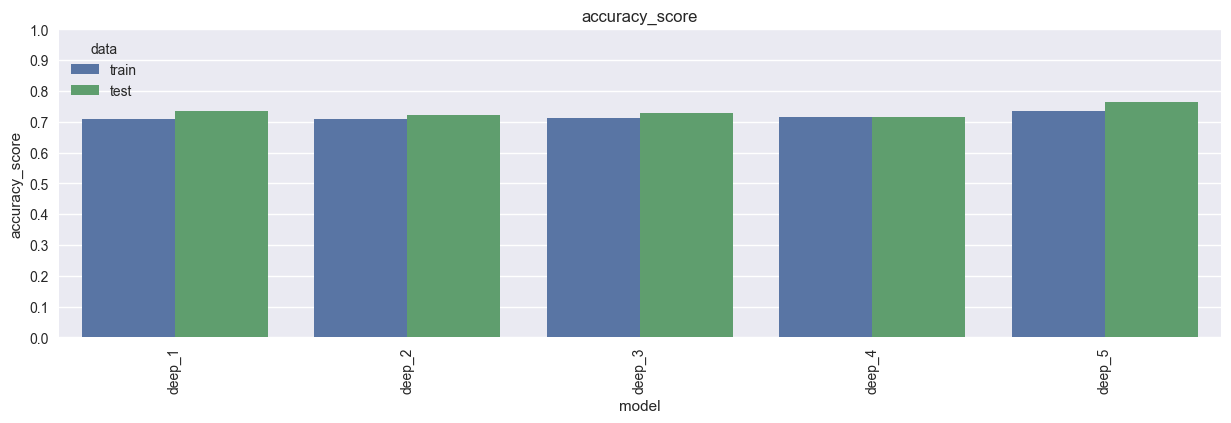

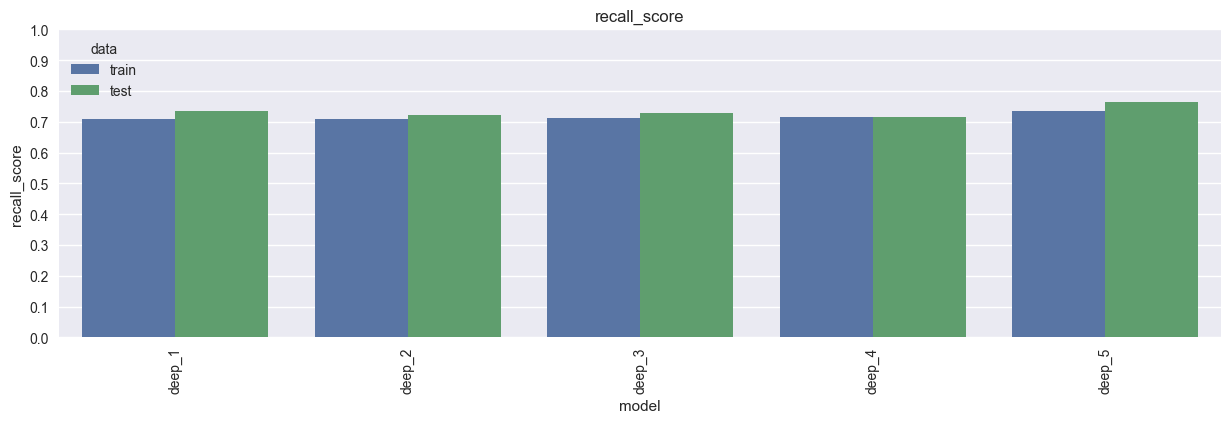

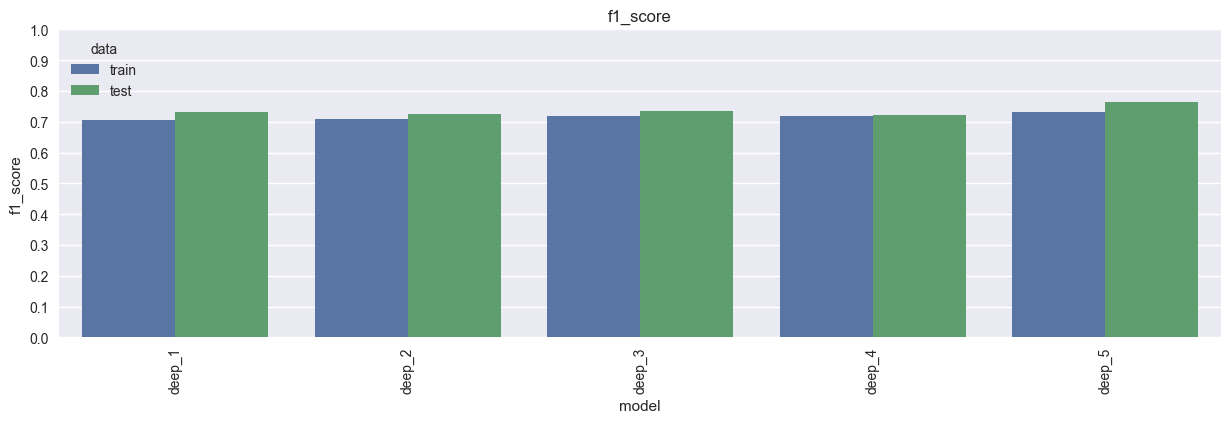

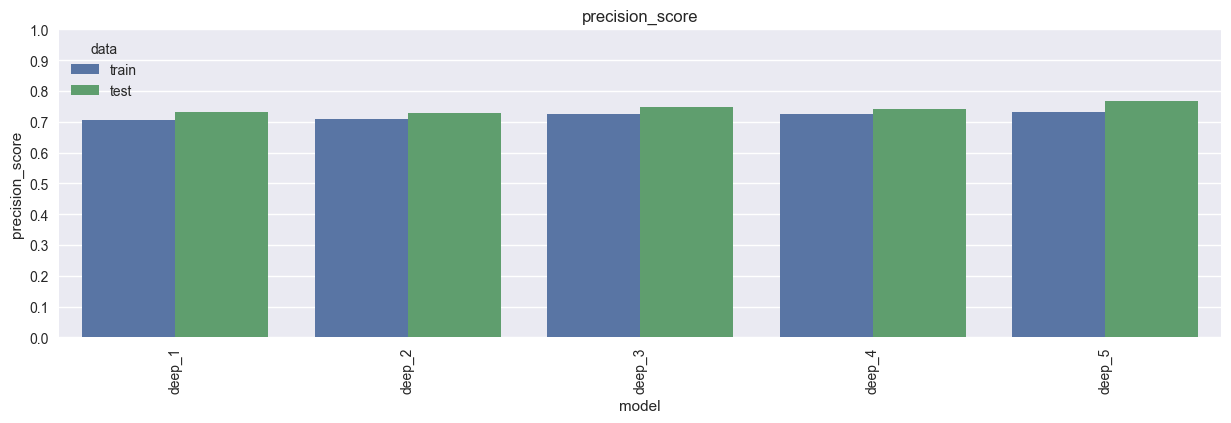

In [69]:
for metric in evaluation_dataset.columns: 
    if metric in ['model', 'data']:
        continue

    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model',y=metric, hue='data')
    plt.xticks(rotation = 90)
    plt.yticks(np.linspace(0,1,11))
    plt.show()

# Model Exploraiton

In [70]:
CACHE_MODELS_IMG_DIR_NAME = 'models_arch' 
os.makedirs(CACHE_MODELS_IMG_DIR_NAME, exist_ok=True)

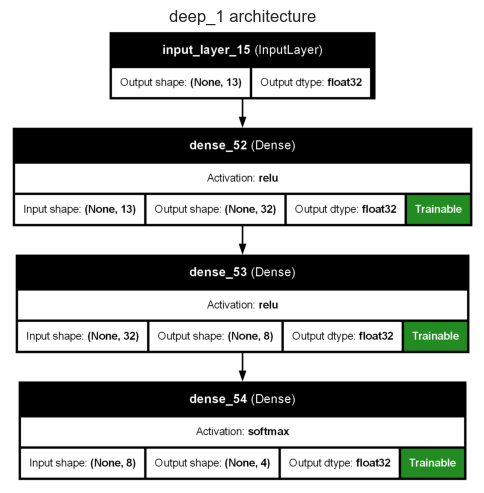

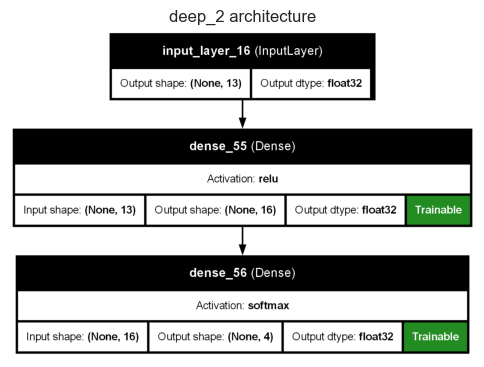

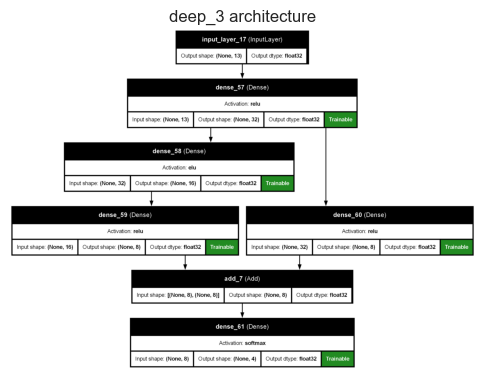

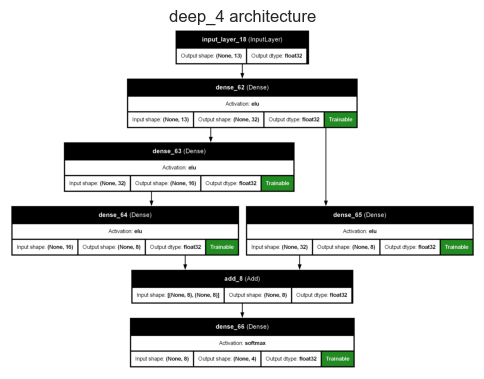

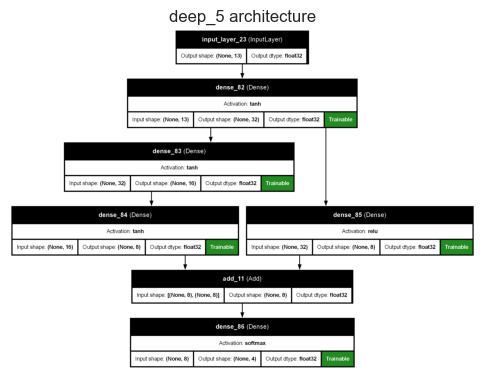

In [71]:
for model in models_list:
    if isinstance(model.model, tf.keras.Model):        
        keras_model = model.model

        img_path = os.path.join(CACHE_MODELS_IMG_DIR_NAME,f'{model.name}.png')

        plot_model(
            keras_model,
            to_file= img_path,          
            show_shapes=True,    
            dpi =200,        
            show_layer_names=True,        
            expand_nested=True,
            show_layer_activations=True,
            show_trainable=True,
            show_dtype=True,
        )       

        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{model.name} architecture")
        plt.show()           


# Caching

evaluation

In [72]:
evaluation_dataset.to_csv("eval_dataset.csv")

y vs y hat csv

In [73]:
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions' 
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [74]:
for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat,
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant', constant_values=-1),
            'predict Y test' : np.pad(model.y_test_hat, (0, pad_width), mode='constant', constant_values=-1),
        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

encoders & scalers

In [75]:
CACHE_ENCODE_SCALE_DIR_NAME = 'encoders_scalers' 
os.makedirs(CACHE_ENCODE_SCALE_DIR_NAME, exist_ok=True)

In [76]:
save_obj( standard_scaller, f"{CACHE_ENCODE_SCALE_DIR_NAME}/standard_scaller.pickle" )

In [77]:
save_obj( label_encoder, f"{CACHE_ENCODE_SCALE_DIR_NAME}/label_encoder.pickle" )